<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split



!pip install --upgrade scikit-learn

import io
import os
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim
import ast



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
url1 = '/content/drive/MyDrive/dataisear(preputama).csv'
url2 = '/content/drive/MyDrive/dataisear(preptambah).csv'
df = pd.read_csv(url1)

In [3]:
temp=[]
for senten in df.dokumen:
  temp.append(ast.literal_eval(senten))
df.dokumen=temp

In [4]:
pakai_model=1

In [5]:
from gensim.models import word2vec
!pip install glove-python-binary
from glove import Glove
from glove import Corpus

     |████████████████████████████████| 948 kB 4.6 MB/s 


In [9]:
if pakai_model == 1:#load model word2vec
  model = gensim.models.word2vec.Word2Vec.load('/content/drive/MyDrive/korpusblogspertiga(preputama).w2v')

elif pakai_model == 2:#load model glove
  model=Glove.load('/content/drive/MyDrive/dataisear(preputama).glove')

In [10]:
if pakai_model == 1:
  print(model.wv.vectors.shape)
elif pakai_model == 2:
  print(model.word_vectors.shape)

(1048781, 100)


In [ ]:
if pakai_model == 1:
  print(model.wv["moment"])
elif pakai_model == 2:
  print(model.word_vectors[model.dictionary['moment']])

In [12]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)

if pakai_model == 1:
  for senten in df.dokumen:
    for word in senten:
      temp=np.add(temp,model.wv[word])
    temp=temp/len(senten)
    ekstrak.append(temp)

elif pakai_model == 2:
  for senten in df.dokumen:
    for word in senten:
      temp=np.add(temp,model.word_vectors[model.dictionary[word]])
    temp=temp/len(senten)
    ekstrak.append(temp)

has_vec=ekstrak

In [13]:
X=has_vec
y=df.emosi
print(np.shape(X))
print(np.shape(y))

(7516, 100)
(7516,)


In [14]:
df.head()

,emosi,dokumen
0,joy,"[on, days, when, i, feel, close, to, my, partn..."
1,fear,"[every, time, i, imagine, that, someone, i, lo..."
2,anger,"[when, i, had, been, obviously, unjustly, trea..."
3,sadness,"[when, i, think, about, the, short, time, that..."
4,disgust,"[at, a, gathering, i, found, myself, involunta..."


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7516 entries, 0 to 7515
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emosi    7516 non-null   object
 1   dokumen  7516 non-null   object
dtypes: object(2)
memory usage: 117.6+ KB


In [16]:
category = pd.get_dummies(df.emosi)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='emosi')
df_new

,dokumen,anger,disgust,fear,guilt,joy,sadness,shame
0,"[on, days, when, i, feel, close, to, my, partn...",0,0,0,0,1,0,0
1,"[every, time, i, imagine, that, someone, i, lo...",0,0,1,0,0,0,0
2,"[when, i, had, been, obviously, unjustly, trea...",1,0,0,0,0,0,0
3,"[when, i, think, about, the, short, time, that...",0,0,0,0,0,1,0
4,"[at, a, gathering, i, found, myself, involunta...",0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
7511,"[two, years, back, someone, invited, me, to, b...",0,0,0,0,0,0,1
7512,"[i, had, taken, the, responsibility, to, do, s...",0,0,0,0,0,0,1
7513,"[i, was, at, home, and, i, heard, a, loud, sou...",0,0,1,0,0,0,0
7514,"[i, did, not, do, the, homework, that, the, te...",0,0,0,1,0,0,0


In [17]:
df_new.isnull().sum()

dokumen    0
anger      0
disgust    0
fear       0
guilt      0
joy        0
sadness    0
shame      0
dtype: int64

In [19]:
X = has_vec
y = df_new[['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame']].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [25]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(6012, 100)
(1504, 100)
(6012, 7)
(1504, 7)


In [22]:
max_features = 100

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
 
seq_train = tokenizer.texts_to_sequences(X_train)
seq_test = tokenizer.texts_to_sequences(X_test)
 
X_train_pad = pad_sequences(seq_train, padding='post') 
X_test_pad = pad_sequences(seq_test, padding='post',)

In [ ]:
X_train_pad[1]

array([  28,   56,   10,    2, 4202,  361, 1422,    5,   76,    1,   46,
         38,    6,   31,   66,  824,   18,   12,    1,   23,  372,    2,
        328,  281,   13,    1,   46,   10,    5,   76,    6,   62,  107,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [26]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
import tensorflow as tf

# Creating model
model = Sequential()
model.add(Embedding(input_dim=100, output_dim=50))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))
model.add(Dense(82, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer= tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          5000      
                                                                 
 dropout (Dropout)           (None, None, 50)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 128)              58880     
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 82)                10578     
                                                                 
 dropout_2 (Dropout)         (None, 82)                0         
                                                        

In [27]:
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 3, 
                                        restore_best_weights = True)

In [ ]:
np.shape(X_train_pad)

In [31]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_test, y_test), 
                    callbacks=[earlystopping])

ValueError: ignored

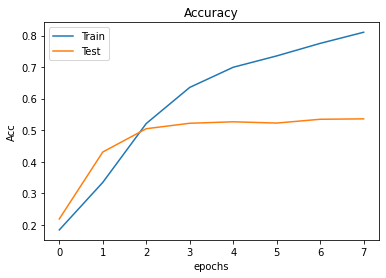

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

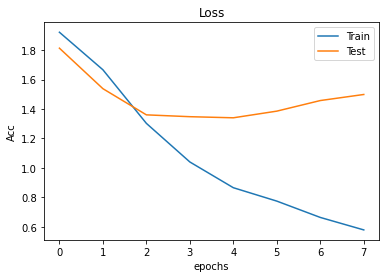

In [ ]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test_pad, y_test)

47/47 [==============================] - 2s 42ms/step - loss: 1.3404 - accuracy: 0.5266


[1.3403563499450684, 0.5265957713127136]